#### telluric

## Interactive vector and raster geospatial data manipulation in Python

#### Guy Doulberg - 2018-06-04 @ PyCon-IL

https://github.com/satellogic/telluric-talks

![telluric](img/bg.png)

(Introduction)

1. Quick introduction to geospatial data
  - Vector data
  - Raster data
  - Formats
2. Existing software
  - GDAL, GEOS
  - rasterio, Fiona, Shapely
  - Still, too low level
3. telluric library
  - Easy manipulation of geometries
  - Features and collections
  - Input and output
  - Raster data
4. Distributed computing
5. Future work

(Questions?)

# [**Satellogic**](https://www.satellogic.com/)

* We are building a constellation of satellites that orbits earth.
* We are building an infrastructure to collect and store data (mostly images) from this constellation.
* We are producing insights out of this data and other sources of data.
* We are hiring

![satelloguc](img/concetalation.png)



# Guy

* I am part of the team which is responsilbe for collecting storing and accesing the Raster and Vector Data in *Satellogic*.
* Software engineer with experience in big data projects.

# 1. Quick intro to geospatial data

> **Geospatial data**, geographic data, georeferenced data, or just geodata "are defined in the ISO/TC 211 series of standards as data and information having an implicit or explicit association with a location relative to the Earth"
>
> -- https://en.wikipedia.org/wiki/Geographic_data_and_information

> A **geographic information system (GIS)** is a system designed to capture, store, manipulate, analyze, manage, and present spatial or geographic data.
>
> -- https://en.wikipedia.org/wiki/Geographic_information_system

## Two forms: vector and raster

* **Vector data**:  
 * Defining shapes
* **Raster data**: 
 * Assigning pixels values

![Vector vs Raster](img/vector-raster2.png)

<p style="font-size:0.8em">Image by Víctor Olaya "Sistemas de Información Geográfica", CC-BY</p>

Another example:
![Vector vs Raster2](http://vector-conversions.com/images/vector-vs-raster-jawlensky.jpg)

more info about rasters vs vectors:
http://vector-conversions.com/vectorizing/raster_vs_vector.html

## Vector data

* **Entities**: Points, Lines and Polygons
* **Common formats**: ESRI Shapefiles, GeoJSON, TopoJSON, ...

![Vector data](img/simple-vector-map.png)

<p style="font-size:0.8em">Image by M. W. Toews https://en.wikipedia.org/wiki/File:Simple_vector_map.svg, CC-BY</p>

## Raster data

* **Common formats**: GeoTIFF, JPEG2000, SRTM3, ... 

![Raster data](img/simple-raster.png)

# GEO referenced 

* Vectors and Rasters can exist in fields other than GIS.
* The are part of a GIS when they are Geo-Referenced.
* For example: 
 * A *Polygon* is Geo-Referenced when you know how to draw it on earth
 * A *Raster* is Geo-Referenced when you know where is the raster located 

## Projections

A method to locate points on earth

TL;DR: A mess.

* The Earth is approximately a sphere, which is not a [developable surface](https://en.wikipedia.org/wiki/Developable_surface) (i.e. _it cannot be flattened onto a plane without distortion_)
* Therefore, we need _projections_ that attempt to represent the Earth on a plane, with various tradeoffs and limitations

![Projections](img/projections.png)

# 2. ~~Why yet another~~ Existing software

The landscape is complicated and somewhat difficult to navigate at times:

![Landscape](img/landscape.png)

Summary of key libraries:

| Python   |   | C/C++  |
|----------|---|--------|
| pyproj   | ⇒ | PROJ.4 |
| Fiona    | ⇒ | OGR    |
| Shapely  | ⇒ | GEOS   |
| rasterio | ⇒ | GDAL   |

# 3. telluric library

_telluric is an open source (MIT) Python library to manage vector and raster geospatial data in an interactive and easy way._

* Projection-aware geometric operations
* Simple I/O for raster and vector data
* Interactive visualization
* 🕮 Documentation http://telluric.readthedocs.io/
* 🔧 Source https://github.com/satellogic/telluric

Importing for interactive use is short:

In [1]:
import telluric as tl
from telluric.constants import WGS84_CRS, WEB_MERCATOR_CRS

Basic geometry definition using `GeoVector`: in the simplest case, the bounds and the projection (CRS)

In [2]:
gush_dan = tl.GeoVector.from_bounds(
    xmin=34.6, ymin=32, xmax=35.0, ymax=32.3, crs=WGS84_CRS
)
print(gush_dan)

GeoVector(shape=POLYGON ((34.6 32, 34.6 32.3, 35 32.3, 35 32, 34.6 32)), crs=CRS({'init': 'epsg:4326'}))


### We added extra attention to Jupyter noteobook visualization, checkout this plot 

/home/guyd/pEnvs/telluric-dev/local/lib/python3.5/site-packages/telluric/plotting.py:141: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


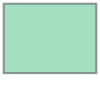

In [3]:
gush_dan

Using Shapely geometries is also allowed:

/home/guyd/pEnvs/telluric-dev/local/lib/python3.5/site-packages/telluric/plotting.py:141: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


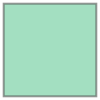

In [4]:
from shapely.geometry import Polygon

south_tlv = tl.GeoVector(
    Polygon([(34.75, 32.04), (34.75, 32.06), (34.77,32.06), (34.77, 32.04), ( 34.75, 32.04)]),
    WGS84_CRS
)
south_tlv

## Access several properties:

/home/guyd/pEnvs/telluric-dev/local/lib/python3.5/site-packages/telluric/plotting.py:141: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


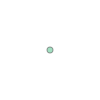

In [5]:
gush_dan.centroid

In [6]:
gush_dan.area  # Real area in square meters

1259014132.9260154

### Geomteric Relations

In [7]:
gush_dan.within(south_tlv)

False

In [8]:
south_tlv.within(gush_dan)

True

In [9]:
print(south_tlv.difference(gush_dan))

GeoVector(shape=GEOMETRYCOLLECTION EMPTY, crs=CRS({'init': 'epsg:4326'}))


/home/guyd/pEnvs/telluric-dev/local/lib/python3.5/site-packages/telluric/plotting.py:141: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


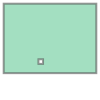

In [10]:
gush_dan.difference(south_tlv)

* Features: `GeoVector` + attributes
* `FeatureCollection`s: a sequence of features

In [11]:
gf1 = tl.GeoFeature(
    gush_dan,
    {'district': 'גוש דן'}
)
gf2 = tl.GeoFeature(
    south_tlv,
    {'city': 'תל אביב'}
)
print(gf1)
print(gf2)

GeoFeature(Polygon, {'district': 'גוש דן'})
GeoFeature(Polygon, {'city': 'תל אביב'})


In [12]:
fc = tl.FeatureCollection([gf1, gf2])
fc

/home/guyd/pEnvs/telluric-dev/local/lib/python3.5/site-packages/telluric/plotting.py:141: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


# Raster data:

In [13]:
# This will only save the URL in memory
rs = tl.GeoRaster2.open(
    "https://github.com/mapbox/rasterio/raw/master/tests/data/rgb_deflate.tif"
)

# These calls will fecth some GeoTIFF metadata
# without reading the whole image
print(rs.crs)
print(rs.band_names)

CRS({'init': 'epsg:32618'})
[0, 1, 2]


/home/guyd/pEnvs/telluric-dev/local/lib/python3.5/site-packages/telluric/plotting.py:141: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


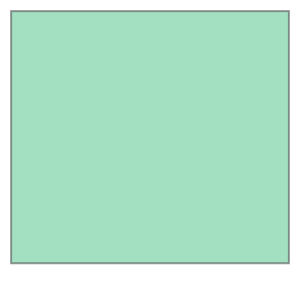

In [14]:
rs.footprint() # is the bouding box

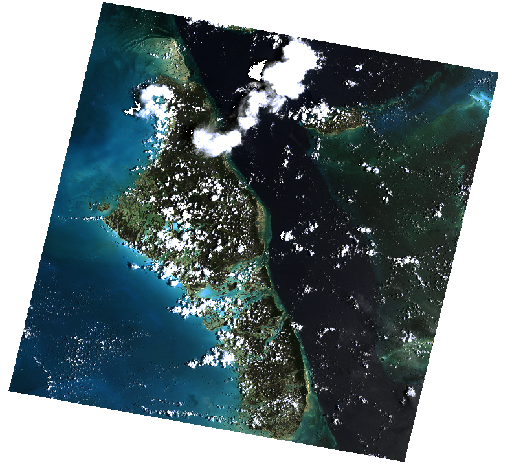

In [15]:
rs

In [29]:
rs.image[:,200:300, 200:240]

masked_array(
  data=[[[15, 20, 23, ..., 41, 38, 29],
         [17, 15, 23, ..., 41, 46, 46],
         [18, 17, 17, ..., 39, 39, 44],
         ...,
         [106, 49, 62, ..., 46, 58, 50],
         [255, 255, 255, ..., 38, 37, 43],
         [255, 229, 255, ..., 40, 31, 35]],

        [[94, 98, 100, ..., 129, 98, 62],
         [98, 96, 100, ..., 127, 127, 133],
         [98, 96, 94, ..., 126, 126, 129],
         ...,
         [145, 79, 116, ..., 47, 58, 51],
         [255, 255, 255, ..., 43, 41, 45],
         [255, 249, 255, ..., 41, 33, 37]],

        [[131, 131, 131, ..., 161, 125, 86],
         [133, 133, 135, ..., 164, 160, 161],
         [133, 132, 129, ..., 159, 160, 157],
         ...,
         [141, 77, 108, ..., 29, 34, 31],
         [255, 255, 255, ..., 31, 30, 31],
         [255, 255, 255, ..., 23, 19, 27]]],
  mask=[[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, Fal

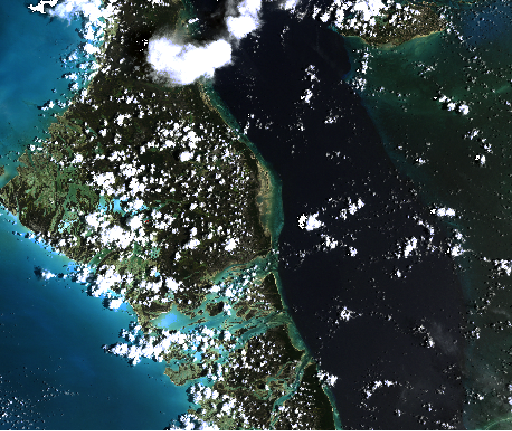

In [16]:
# Crop fetch only the data required to build the raster
rs.crop(rs.footprint().buffer(-50000))

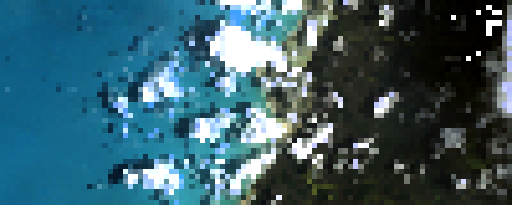

In [17]:
rs[200:300, 200:240] # the image is streched due to the presentation layer

In [18]:
# Rasterizing Vectors
# Geting OpenStreetMap data of Tel Aviv
from shapely.geometry import shape
import json


with open("telaviv.geojson") as data:
    features = json.load(data)["features"]
    fc = tl.FeatureCollection([tl.GeoFeature(tl.GeoVector(shape(feature["geometry"])),feature["properties"]) for feature in features])
fc

/home/guyd/pEnvs/telluric-dev/local/lib/python3.5/site-packages/telluric/plotting.py:141: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


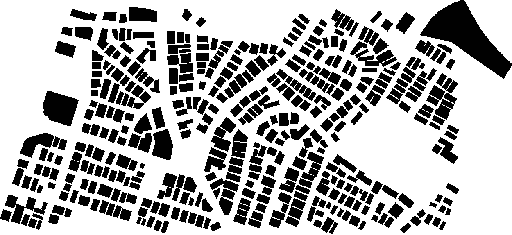

In [19]:
streets_raster = fc.rasterize(dest_resolution=1)
streets_raster

# Projections


In [20]:
print(gush_dan)

GeoVector(shape=POLYGON ((34.6 32, 34.6 32.3, 35 32.3, 35 32, 34.6 32)), crs=CRS({'init': 'epsg:4326'}))


In [21]:
projected = gush_dan.reproject(tl.constants.WEB_MERCATOR_CRS)
print(projected)

GeoVector(shape=POLYGON ((3851654.381447267 3763310.627144652, 3851654.381447267 3802755.031859114, 3896182.177764576 3802755.031859114, 3896182.177764576 3763310.627144652, 3851654.381447267 3763310.627144652)), crs=CRS({'init': 'epsg:3857'}))


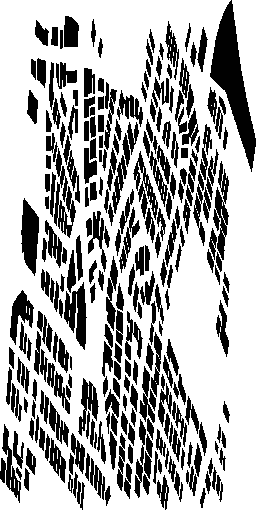

In [22]:
streets_raster.resize(dest_height=streets_raster.width*20, dest_width=streets_raster.width*10)

# Distributed Computation

* We can use the *rasterazation* and *crop* methods to distriubte the workload.
* Imagine a 1m resultion of entire Israel is about 20 GB.
* Imagine that you have hundereds of these rasters, and you need to read each of the pixels.




## Before we continue some backgroud

# Cloud Optimized GeoTIFF

A Cloud Optimized GeoTIFF (COG) is a regular GeoTIFF file, aimed at being hosted on a HTTP file server, with an internal organization that enables more efficient workflows on the cloud. It does this by leveraging the ability of clients issuing HTTP GET range requests to ask for just the parts of a file they need.[1](http://www.cogeo.org/)

Advatanges:
* Cheap storage such as AWS s3, GFS or Azure Blobs
* Download only the data you need
* Supports legacy software


We use COGs to enable distributed computation:
* We split the workload to region.
* Each worker using COG will fetch only the data it needs.
* We destribute the workers on a cluster (they share nothing)

In [23]:
from telluric.vectors import generate_tile_coordinates

list_of_regions = list(generate_tile_coordinates(rs.footprint(), num_tiles=(10,10)))

# This line is to visualize and not required  
tl.FeatureCollection(tl.GeoFeature(tile, {}) for tile in list_of_regions)

/home/guyd/pEnvs/telluric-dev/local/lib/python3.5/site-packages/telluric/plotting.py:141: UserWarning: Plotting a limited representation of the data, use the .plot() method for further customization
  "Plotting a limited representation of the data, use the .plot() method for further customization")


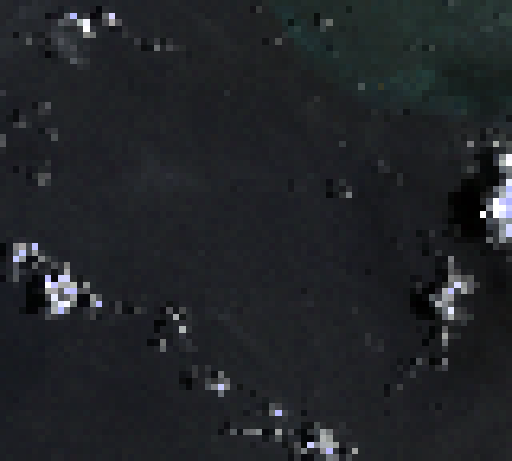

In [24]:
chunk0 = rs.crop(list_of_regions[17])
chunk0

In [25]:
def worker(raster_filename, roi):
     raster = tl.GeoRaster2.open(raster_filename) #Lazy loading of the raster
     chunk0 = raster.crop(roi)
     return chunk0.image.max()

import dask.multiprocessing, dask
RASTER_URL="https://github.com/mapbox/rasterio/raw/master/tests/data/rgb_deflate.tif"
items = [dask.delayed(worker)(RASTER_URL, roi) for roi in list_of_regions]

maxs = dask.compute(*items, get=dask.multiprocessing.get)




In [26]:
from numpy.ma.core import MaskedConstant

max([val for val in maxs if not isinstance(val,MaskedConstant)])

255

# 4. Internal uses at Satellogic

* Visualize the captures from our satellites
* Estimate the coverage and do area computations
* Large scale geospatial raster and vector data ingestion and manipulation

# 5. Future work

* 🐛 List of issues https://github.com/satellogic/telluric/issues
* Better visualization (good performance, unified approach)
* Simpler constructors for objects
* Better handling of corner cases (specially the antimeridian)
* More advanced geometrical operations (such as geodesic buffering)
* ...Surprises

# Questions?

* 🕮 http://telluric.readthedocs.io/
* 🔧 https://github.com/satellogic/telluric, https://github.com/satellogic/telluric

![Final](img/final.png)